In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from pathlib import Path
from sklearn.metrics import mean_squared_error
import sys
sys.path.append("..")   # add parent directory to Python path
import functions

In [2]:
tf.random.set_seed(42)

In [3]:
voltage = functions.load_voltage('../data/tau_d_0.41_temporal_APD_step_4 (9).csv')
APD,DI,BCL = functions.get_APD_DI_BCL([voltage])

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(voltage.reshape(-1, 1))

In [5]:
window_size = 5000
prediction_size = 1000

data_lst = []
scaler = MinMaxScaler(feature_range=(0,1))
folder = Path("D:\Documents\GitHub\ML_cardiac_prediction\data")
for p in folder.glob("*.csv"):   # use rglob("*.csv") for subfolders
    voltage = functions.load_voltage(p)
    if len(voltage) <= 10000:
        continue
    scaled_voltage = scaler.fit_transform(voltage.reshape(-1, 1))
    data_lst.append(scaled_voltage)
X = []
Y = []
for scaled_voltage in data_lst:
    for i in range(window_size, len(scaled_voltage), prediction_size + window_size):
        X.append(scaled_voltage[i-window_size:i, 0])
        Y.append(scaled_voltage[i:i+prediction_size, 0])
X = np.array(X)
Y = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,  shuffle=False)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\11061\AppData\Local\Temp\ipykernel_23464\2082308337.py:6: SyntaxWarning: invalid escape sequence '\D'
  folder = Path("D:\Documents\GitHub\ML_cardiac_prediction\data")


In [6]:
X_train.shape

(32, 5000, 1)

In [7]:
X_test.shape

(8, 5000, 1)

In [8]:
Y_train.shape

(32, 1000)

In [9]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mape']
)

d:\Anaconda\envs\lstm\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5000, 128)      │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5000, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       129,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,144 (1.25 MB)

 Trainable params: 327,144 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1,shuffle=False )
model.save("lstm_from_5000_pred_1000_batch_50.keras")

# later
#from tensorflow import keras
#restored = keras.models.load_model("my_model.keras")

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.3642 - mae: 0.4761 - mape: 2327.7703 - val_loss: 0.4018 - val_mae: 0.5040 - val_mape: 316.7864
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.3596 - mae: 0.4726 - mape: 3135.1858 - val_loss: 0.3950 - val_mae: 0.5001 - val_mape: 476.0740
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.3533 - mae: 0.4689 - mape: 4114.6846 - val_loss: 0.3833 - val_mae: 0.4939 - val_mape: 792.6002
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.3430 - mae: 0.4634 - mape: 7535.1143 - val_loss: 0.3623 - val_mae: 0.4836 - val_mape: 1410.5205
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.3257 - mae: 0.4551 - mape: 12405.9375 - val_loss: 0.3256 - val_mae: 0.4661 - val_mape: 2650.1587
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2946 - mae: 0.4401 - mape: 19235.0664 - val_loss: 0.2741 - val_mae: 0.4407 - val_mape: 4804.0547
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2516 - mae: 0.4180 

In [25]:
yhat = model.predict(X_test)   # shape (1, 1000)
print(mean_squared_error(Y_test.ravel(), yhat.ravel()))  # This should be close to 0.1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
0.08995280699663438


In [22]:
yhat = model.predict(X_test[2:3], verbose=0)   # shape (1, 1000)
y_pred = scaler.inverse_transform(yhat.reshape(-1, 1)).ravel()  # if your scaler was fit on single-column data
y_true = scaler.inverse_transform(Y_test[2].reshape(-1, 1)).ravel()


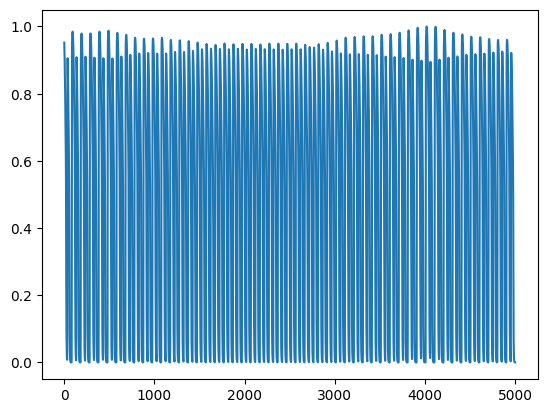

In [23]:
plt.plot(X_test[2:3][0])

0.055035555991302


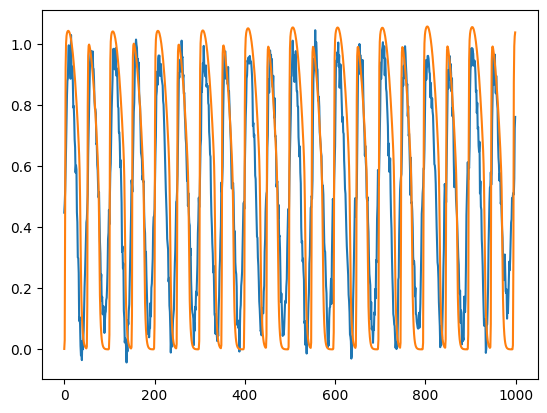

In [24]:
plt.plot(y_pred)
plt.plot(y_true)
print(mean_squared_error(y_true, y_pred))

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 5000, 128)      │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5000, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │       129,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 981,434 (3.74 MB)

 Trainable params: 327,144 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 654,290 (2.50 MB)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

def delay_embed(x, m=3, tau=1):
    """
    Time-delay embed a 1D array x into R^m with delay tau.
    Returns an array of shape (N - (m-1)*tau, m).
    """
    x = np.asarray(x).reshape(-1)
    N = x.size - (m - 1) * tau
    if N <= 0:
        raise ValueError("Series too short for given m and tau.")
    # columns: [x(t), x(t+tau), ..., x(t+(m-1)tau)]
    return np.column_stack([x[i:i+N] for i in range(0, m*tau, tau)])

def plot_phase_from_1d(x, m=3, tau=1, zscore=True, two_d=True):
    """
    Build embedding and draw phase portrait(s).
    - zscore: standardize each coordinate for nicer aspect.
    - two_d: also draw the 2D projection x(t) vs x(t+tau).
    """
    X = delay_embed(x, m=m, tau=tau)
    if zscore:
        X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-12)

    # 3D trajectory
    fig = plt.figure(figsize=(5, 5), dpi=200)
    ax = fig.add_subplot(projection='3d')
    ax.plot(X[:,0], X[:,1], X[:,2], linewidth=0.6, alpha=0.9)
    ax.set_xlabel('x(t)')
    ax.set_ylabel(f'x(t+{tau})')
    ax.set_zlabel(f'x(t+{2*tau})')
    ax.set_title(f'Time-delay embedding (m={m}, τ={tau})')
    ax.grid(False)

    # Optional: 2D projection like your panel style
    if two_d:
        fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=200)
        ax2.plot(X[:,0], X[:,1], linewidth=0.5, alpha=0.35)
        ax2.set_xlabel('x(t)')
        ax2.set_ylabel(f'x(t+{tau})')
        ax2.set_aspect('equal', 'box')
        ax2.set_title('2D projection')
        ax2.axis('off')  # clean look like the paper

    plt.show()

# --- Usage ---
# voltage is your 1D NumPy array of cardiac membrane potential samples
# plot_phase_from_1d(voltage, m=3, tau=1)


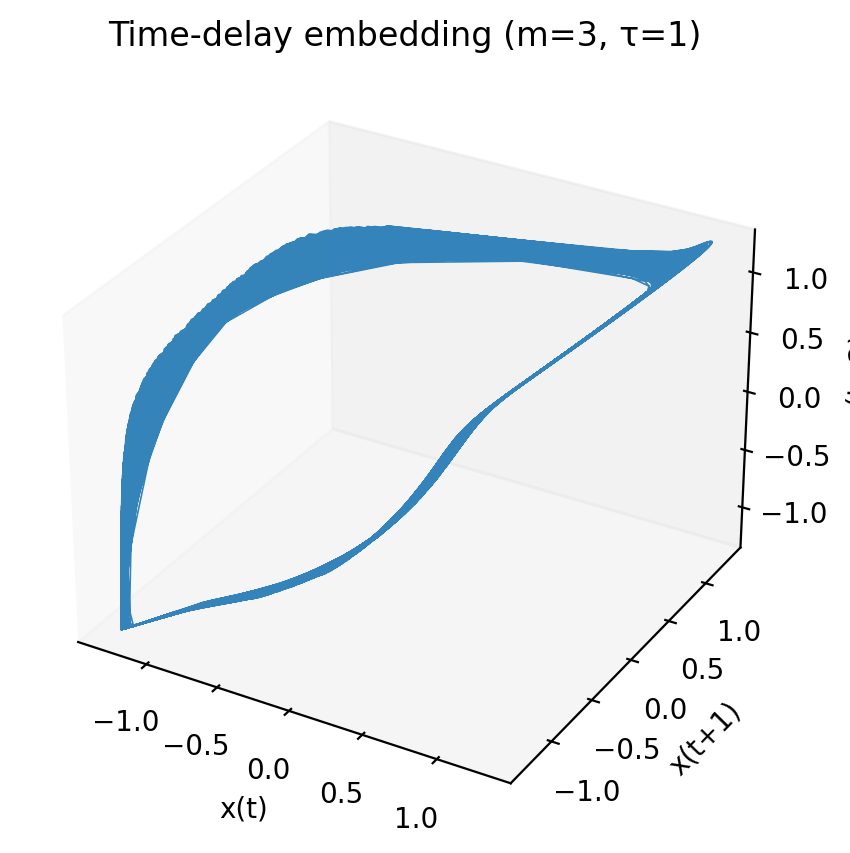

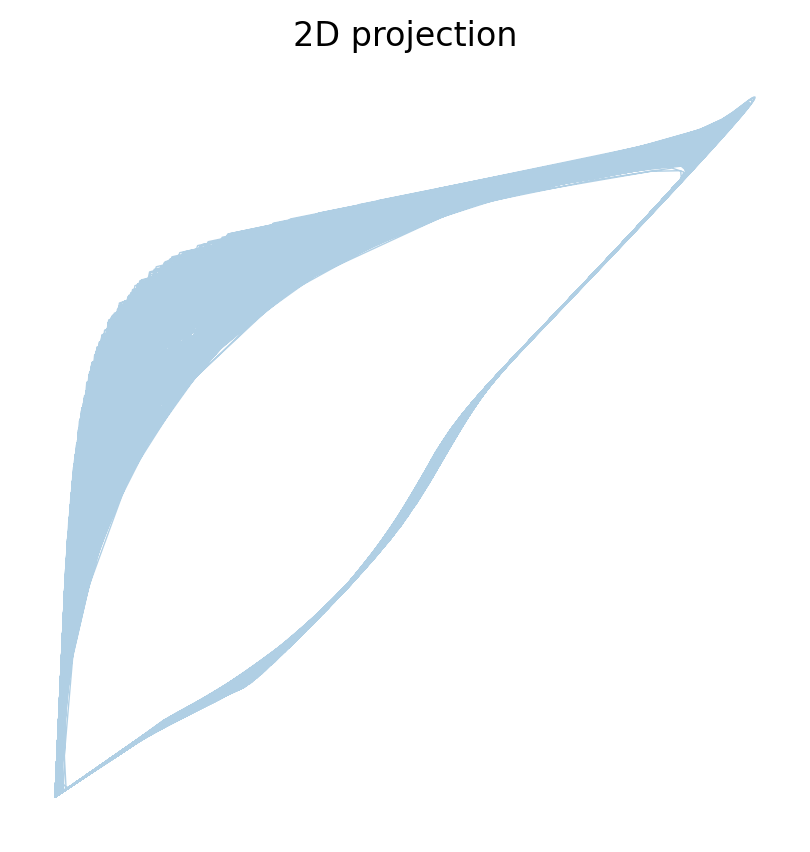

In [29]:
plot_phase_from_1d(voltage, m=3, tau=1)


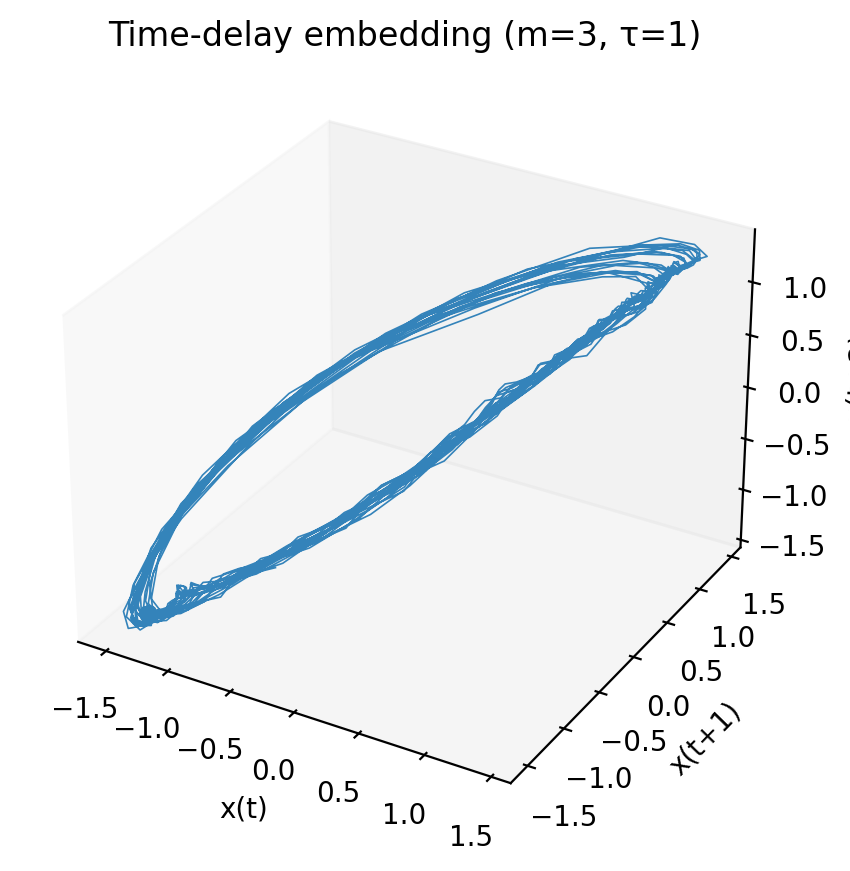

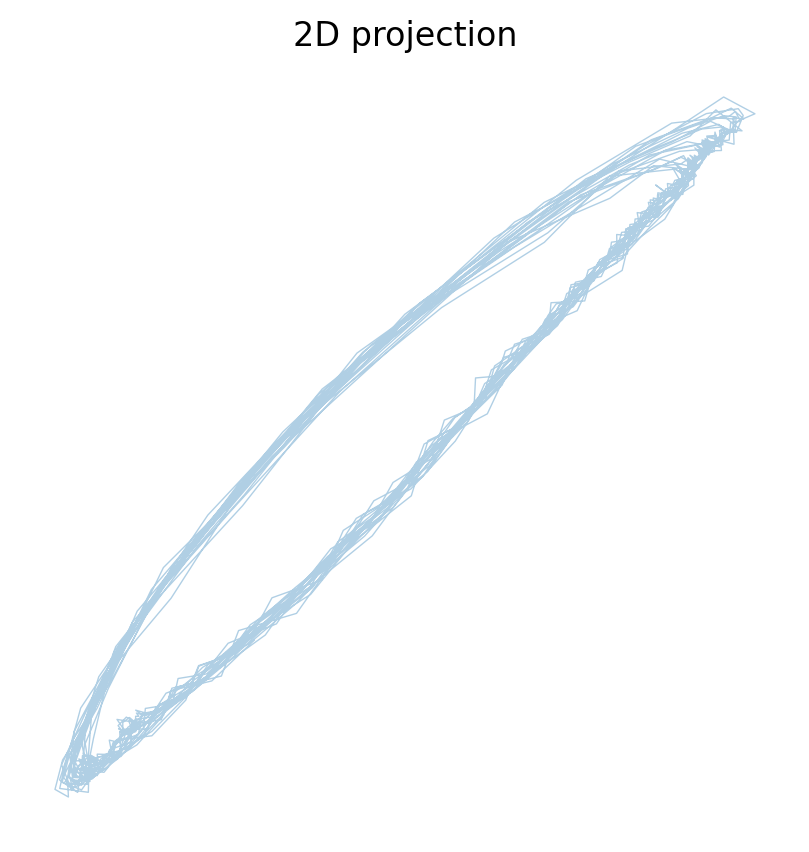

In [32]:
plot_phase_from_1d(y_pred, m=3, tau=1)
